# Apply Naive Bayes

## Loading Data

In [ ]:
import pandas
import numpy as np
from numpy import argsort
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import randint as sp_randint
from scipy.sparse import hstack
from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

data = pandas.read_csv('preprocessed_data.csv', nrows = 100000)
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


<h2>Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y)
X_train.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
71317,il,mrs,grades_prek_2,2,math_science specialneeds,mathematics specialneeds,the students i teach come rural town being kin...,99.48
47165,ca,ms,grades_6_8,2,specialneeds,specialneeds,my students dynamic group learners as students...,269.99
60579,nv,mrs,grades_prek_2,0,literacy_language math_science,literacy mathematics,i group eager learn students love technology c...,257.99
89080,fl,mrs,grades_3_5,5,literacy_language math_science,literacy mathematics,my school resides rural area low socio economi...,290.75
46820,sc,ms,grades_3_5,3,history_civics literacy_language,history_geography literacy,as teacher low income high poverty school stud...,424.91


<h2>Encoding essay, school state, teacher prefix and project_title</h2>

In [ ]:
# Apply BoW

# school state
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

X_train_state_1 = vectorizer.transform(X_train['school_state'].values)
X_test_state_1 = vectorizer.transform(X_test['school_state'].values)

print("After vectorization, school state")
print(X_train_state_1.shape, y_train.shape)
print(X_test_state_1.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# teacher prefix
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

X_train_teacherprefix_1 = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacherprefix_1 = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorization, teacher prefix")
print(X_train_teacherprefix_1.shape, y_train.shape)
print(X_test_teacherprefix_1.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# project grade category
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

X_train_projectgrade_1 = vectorizer.transform(X_train['project_grade_category'].values)
X_test_projectgrade_1 = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorization, project grade category")
print(X_train_projectgrade_1.shape, y_train.shape)
print(X_test_projectgrade_1.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# clean categories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

X_train_cleancategories_1 = vectorizer.transform(X_train['clean_categories'].values)
X_test_cleancategories_1 = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorization, categories")
print(X_train_cleancategories_1.shape, y_train.shape)
print(X_test_cleancategories_1.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# clean subcategories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

X_train_cleansubcategories_1 = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_cleansubcategories_1 = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorization, subcategories")
print(X_train_cleansubcategories_1.shape, y_train.shape)
print(X_test_cleansubcategories_1.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# essays
vectorizer = CountVectorizer(min_df = 10, ngram_range = (1, 5),max_features = 5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_train_essays_1 = vectorizer.transform(X_train['essay'].values)
X_test_essays_1 = vectorizer.transform(X_test['essay'].values)

print("After vectorization, essays")
print(X_train_essays_1.shape, y_train.shape)
print(X_test_essays_1.shape, y_test.shape)


After vectorization, school state
(70000, 51) (70000,)
(30000, 51) (30000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
After vectorization, teacher prefix
(70000, 5) (70000,)
(30000, 5) (30000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
After vectorization, project grade category
(70000, 4) (70000,)
(30000, 4) (30000,)
['grades_3_5', 'gr

In [ ]:
# Apply TF-IDF vectorization

# school state
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

X_train_state_tfidf = vectorizer.transform(X_train['school_state'].values)
X_test_state_tfidf = vectorizer.transform(X_test['school_state'].values)

school_state = vectorizer.get_feature_names()

print("After vectorization, school state")
print(X_train_state_tfidf.shape, y_train.shape)
print(X_test_state_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# teacher prefix
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

X_train_teacherprefix_tfidf = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacherprefix_tfidf = vectorizer.transform(X_test['teacher_prefix'].values)

teacher_prefix = vectorizer.get_feature_names()

print("After vectorization, teacher prefix")
print(X_train_teacherprefix_tfidf.shape, y_train.shape)
print(X_test_teacherprefix_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# project grade category
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

X_train_projectgrade_tfidf = vectorizer.transform(X_train['project_grade_category'].values)
X_test_projectgrade_tfidf = vectorizer.transform(X_test['project_grade_category'].values)

project_grade = vectorizer.get_feature_names()

print("After vectorization, project grade category")
print(X_train_projectgrade_tfidf.shape, y_train.shape)
print(X_test_projectgrade_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# clean categories
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

X_train_cleancategories_tfidf = vectorizer.transform(X_train['clean_categories'].values)
X_test_cleancategories_tfidf = vectorizer.transform(X_test['clean_categories'].values)

clean_categories = vectorizer.get_feature_names()

print("After vectorization, categories")
print(X_train_cleancategories_tfidf.shape, y_train.shape)
print(X_test_cleancategories_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# clean subcategories
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

X_train_cleansubcategories_tfidf = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_cleansubcategories_tfidf = vectorizer.transform(X_test['clean_subcategories'].values)

clean_subcategories = vectorizer.get_feature_names()

print("After vectorization, subcategories")
print(X_train_cleansubcategories_tfidf.shape, y_train.shape)
print(X_test_cleansubcategories_tfidf.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("-" * 200)

# essays
vectorizer = TfidfVectorizer(min_df = 10, ngram_range = (1, 5), max_features = 5000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

X_train_essays_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essays_tfidf = vectorizer.transform(X_test['essay'].values)

essays = vectorizer.get_feature_names()

print("After vectorization, essays")
print(X_train_essays_tfidf.shape, y_train.shape)
print(X_test_essays_tfidf.shape, y_test.shape)

tfidf_features = []

for feat in school_state:
    tfidf_features.append(feat)
    
for feat in teacher_prefix:
    tfidf_features.append(feat)

for feat in project_grade:
    tfidf_features.append(feat)

for feat in clean_categories:
    tfidf_features.append(feat)

for feat in clean_subcategories:
    tfidf_features.append(feat)

for feat in essays:
    tfidf_features.append(feat)

print("TF-IDF features len: " + str(len(tfidf_features)))

After vectorization, school state
(70000, 51) (70000,)
(30000, 51) (30000,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
After vectorization, teacher prefix
(70000, 5) (70000,)
(30000, 5) (30000,)
['dr', 'mr', 'mrs', 'ms', 'teacher']
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
After vectorization, project grade category
(70000, 4) (70000,)
(30000, 4) (30000,)
['grades_3_5', 'gr

<h2>Encoding numerical, categorical features</h2>

In [ ]:
# Apply One-Hot Encoding on the categorical features either using OneHotEncoder() (or) CountVectorizer(binary=True)
# Apply Normalization on the numerical features using Normalizer().

# price
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After normalizing, price")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("-" * 200)

# previously posted projects
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previousprojs_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previousprojs_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After normalizing, teacher number of previously posted projects")
print(X_train_previousprojs_norm.shape, y_train.shape)
print(X_test_previousprojs_norm.shape, y_test.shape)


After normalizing, price
(70000, 1) (70000,)
(30000, 1) (30000,)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
After normalizing, teacher number of previously posted projects
(70000, 1) (70000,)
(30000, 1) (30000,)


<h2>Combining BoW and TF-IDF features</h2>

In [ ]:
X_train_1 = hstack((X_train_essays_1, X_train_state_1, X_train_teacherprefix_1, X_train_projectgrade_1, X_train_cleancategories_1, X_train_cleansubcategories_1, X_train_previousprojs_norm, X_train_price_norm)).tocsr()
X_test_1 = hstack((X_test_essays_1, X_test_state_1, X_test_teacherprefix_1, X_test_projectgrade_1, X_test_cleancategories_1, X_test_cleansubcategories_1, X_test_previousprojs_norm, X_test_price_norm)).tocsr()

print("Final Data matrix BoW")
print(X_train_1.shape, y_train.shape)
print(X_test_1.shape, y_test.shape)
print("-" * 200)

X_train_tfidf = hstack((X_train_essays_tfidf, X_train_state_tfidf, X_train_teacherprefix_tfidf, X_train_projectgrade_tfidf, X_train_cleancategories_tfidf, X_train_cleansubcategories_tfidf, X_train_previousprojs_norm, X_train_price_norm)).tocsr()
X_test_tfidf = hstack((X_test_essays_tfidf, X_test_state_tfidf, X_test_teacherprefix_tfidf, X_test_projectgrade_tfidf, X_test_cleancategories_tfidf, X_test_cleansubcategories_tfidf, X_test_previousprojs_norm, X_test_price_norm)).tocsr()

print("Final Data matrix TF-IDF")
print(X_train_tfidf.shape, y_train.shape)
print(X_test_tfidf.shape, y_test.shape)


Final Data matrix BoW
(70000, 5101) (70000,)
(30000, 5101) (30000,)
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Final Data matrix TF-IDF
(70000, 5101) (70000,)
(30000, 5101) (30000,)


<h2>Applying Naive Bayes on different kind of featurization</h2>


In [ ]:
def batch_predict(clf, data):
    
    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

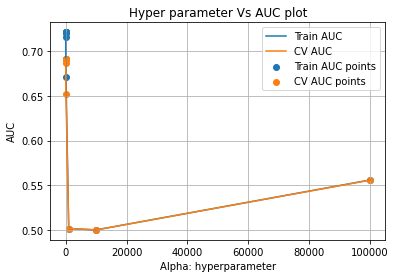

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.170605,0.018233,0.031318,0.000572,1e-05,{'alpha': 1e-05},0.692742,0.693667,0.693503,0.693466,0.683916,0.691459,0.003785,1,0.720258,0.721760,0.723020,0.720200,0.721525,0.721352,0.001049
1,0.152126,0.004686,0.032009,0.001468,0.0001,{'alpha': 0.0001},0.692742,0.693667,0.693503,0.693466,0.683916,0.691459,0.003785,2,0.720258,0.721760,0.723020,0.720200,0.721524,0.721352,0.001049
2,0.139039,0.003200,0.031403,0.000333,0.001,{'alpha': 0.001},0.692741,0.693666,0.693502,0.693465,0.683916,0.691458,0.003785,3,0.720257,0.721760,0.723019,0.720200,0.721524,0.721352,0.001049
3,0.143012,0.007322,0.032803,0.003418,0.01,{'alpha': 0.01},0.692738,0.693662,0.693498,0.693462,0.683913,0.691455,0.003784,4,0.720253,0.721754,0.723014,0.720194,0.721520,0.721347,0.001049
4,0.142604,0.003998,0.032872,0.001030,0.1,{'alpha': 0.1},0.692697,0.693618,0.693469,0.693419,0.683886,0.691418,0.003779,5,0.720206,0.721701,0.722966,0.720145,0.721474,0.721298,0.001048
5,0.146940,0.007705,0.031309,0.000743,1,{'alpha': 1},0.692316,0.693205,0.693142,0.693011,0.683595,0.691054,0.003743,6,0.719721,0.721179,0.722487,0.719647,0.721011,0.720809,0.001051
6,0.141357,0.001753,0.030755,0.000548,10,{'alpha': 10},0.688286,0.689125,0.689763,0.688921,0.680709,0.687361,0.003359,7,0.714843,0.716018,0.717602,0.714704,0.716346,0.715903,0.001064
7,0.141689,0.002737,0.030976,0.000716,100,{'alpha': 100},0.651913,0.653381,0.654387,0.650388,0.648717,0.651757,0.002034,8,0.670824,0.670900,0.672318,0.670342,0.672760,0.671429,0.000937
8,0.141270,0.001479,0.028962,0.000258,1000,{'alpha': 1000},0.500923,0.501879,0.501740,0.501229,0.501877,0.501529,0.000386,10,0.501652,0.501432,0.501571,0.501669,0.501465,0.501558,0.000096
9,0.145728,0.006858,0.029276,0.000809,10000,{'alpha': 10000},0.499663,0.499621,0.499940,0.500604,0.500134,0.499992,0.000359,11,0.500085,0.500075,0.500016,0.499840,0.499957,0.499995,0.000090


In [ ]:
# Performing Hyperparameter Tuning.
# Plotting the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

mdl = MultinomialNB()
params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
clf = GridSearchCV(mdl, params, cv = 5, scoring = 'roc_auc', return_train_score = True, n_jobs = -1)
clf.fit(X_train_1, y_train)

results = pandas.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')

plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

In [ ]:
print(clf.best_estimator_)
best_alpha_bow = clf.best_estimator_.alpha
print('Best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :- ', format(best_alpha_bow, '.5f'))

mdl = MultinomialNB(alpha = best_alpha_bow)
mdl.fit(X_train_1, y_train)

y_train_pred = batch_predict(mdl, X_train_1)    
y_test_pred = batch_predict(mdl, X_test_1)

MultinomialNB(alpha=1e-05)
Best value of hyper-parameter alpha by Gridsearch on BOW Vectorization is :-  0.00001


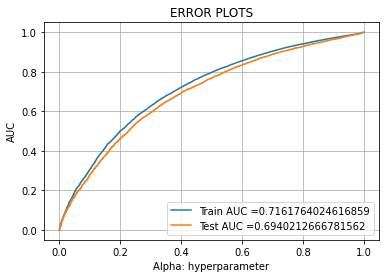

In [ ]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

auc_bow = auc(test_fpr, test_tpr)

plt.plot(train_fpr, train_tpr, label="Train AUC =" + str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="Test AUC =" + str(auc_bow))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Maximum value of tpr*(1-fpr) 0.44192984171475264 for threshold 0.855
Train confusion matrix:
[[ 7218  3410]
 [20738 38634]]


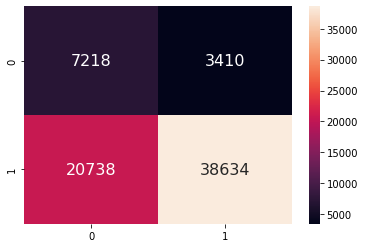

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Test confusion matrix:
[[ 2972  1583]
 [ 9029 16416]]


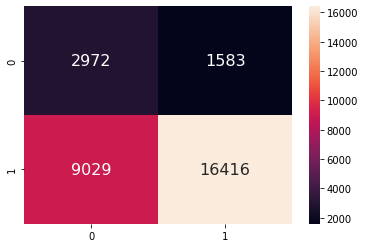

In [ ]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if fpr is very low and tpr is very high
    print("Maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

best_threshold = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix:")
cm_train_bow = confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_threshold))
print(cm_train_bow)
sns.heatmap(cm_train_bow, annot = True, annot_kws = {"size": 16}, fmt = "g")
plt.show()

print("-" * 200)
print("Test confusion matrix:")
cm_test_bow = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_threshold))
print(cm_test_bow)
sns.heatmap(cm_test_bow, annot = True, annot_kws = {"size": 16}, fmt = "g")
plt.show()

#### Set 2

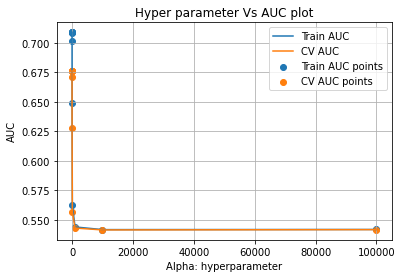

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.158507,0.008306,0.033017,0.001120,1e-05,{'alpha': 1e-05},0.678389,0.685093,0.680349,0.670161,0.668646,0.676528,0.006230,1,0.708904,0.710901,0.710403,0.706093,0.708836,0.709027,0.001677
1,0.154463,0.004290,0.032049,0.001382,0.0001,{'alpha': 0.0001},0.678389,0.685093,0.680349,0.670160,0.668645,0.676527,0.006231,2,0.708904,0.710900,0.710402,0.706092,0.708835,0.709027,0.001677
2,0.143437,0.003766,0.031583,0.000607,0.001,{'alpha': 0.001},0.678382,0.685086,0.680344,0.670154,0.668639,0.676521,0.006231,3,0.708897,0.710893,0.710396,0.706085,0.708828,0.709020,0.001677
3,0.144543,0.005690,0.030725,0.000596,0.01,{'alpha': 0.01},0.678326,0.685030,0.680287,0.670093,0.668585,0.676464,0.006231,4,0.708827,0.710821,0.710331,0.706015,0.708764,0.708951,0.001678
4,0.140338,0.003449,0.032762,0.003045,0.1,{'alpha': 0.1},0.677803,0.684504,0.679793,0.669519,0.668071,0.675938,0.006242,5,0.708131,0.710089,0.709678,0.705320,0.708115,0.708266,0.001675
5,0.145485,0.002473,0.035374,0.003596,1,{'alpha': 1},0.672805,0.679169,0.674772,0.663919,0.663065,0.670746,0.006277,6,0.701392,0.703095,0.703099,0.698645,0.701753,0.701597,0.001630
6,0.142455,0.003072,0.036105,0.008376,10,{'alpha': 10},0.629658,0.634787,0.630773,0.620630,0.621687,0.627507,0.005467,7,0.649005,0.649288,0.649183,0.647428,0.650198,0.649020,0.000897
7,0.145920,0.003960,0.034240,0.002907,100,{'alpha': 100},0.563964,0.562972,0.559571,0.543040,0.553958,0.556701,0.007674,8,0.561265,0.560208,0.561299,0.565426,0.563239,0.562287,0.001849
8,0.145624,0.003012,0.031525,0.000370,1000,{'alpha': 1000},0.551752,0.551631,0.547819,0.524358,0.540134,0.543139,0.010295,9,0.542113,0.541756,0.542939,0.548743,0.544880,0.544086,0.002567
9,0.145139,0.005704,0.031854,0.000264,10000,{'alpha': 10000},0.551964,0.551354,0.545871,0.522457,0.536191,0.541567,0.011104,11,0.539284,0.539336,0.540764,0.546612,0.543173,0.541834,0.002775


In [ ]:
# Perform Hyperparameter Tuning.
# Plot the training and the CV AUC scores, for different values of 'alpha', using a 2D line plot

mdl = MultinomialNB()
params = {'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
clf_tfidf = GridSearchCV(mdl, params, cv = 5, scoring = 'roc_auc', return_train_score = True, n_jobs = -1)
clf_tfidf.fit(X_train_tfidf, y_train)

results = pandas.DataFrame.from_dict(clf_tfidf.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha =  results['param_alpha']

plt.plot(alpha, train_auc, label='Train AUC')

plt.plot(alpha, cv_auc, label='CV AUC')

plt.scatter(alpha, train_auc, label='Train AUC points')
plt.scatter(alpha, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results

In [ ]:
print(clf_tfidf.best_estimator_)
best_alpha_tfidf = clf_tfidf.best_estimator_.alpha
print('Best value of hyper-parameter alpha by Gridsearch on TF-IDF Vectorization is :- ', format(best_alpha_tfidf, '.5f'))

mdl = MultinomialNB(alpha = best_alpha_tfidf)
mdl.fit(X_train_tfidf, y_train)

y_train_pred_tfidf = batch_predict(mdl, X_train_tfidf)
y_test_pred_tfidf = batch_predict(mdl, X_test_tfidf)

MultinomialNB(alpha=1e-05)
Best value of hyper-parameter alpha by Gridsearch on TF-IDF Vectorization is :-  0.00001


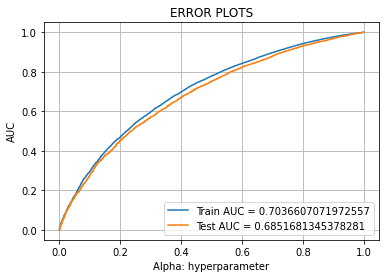

In [ ]:
# Plot the ROC-AUC curves using the probability predictions made on train and test data.

train_fpr_tfidf, train_tpr_tfidf, tr_thresholds_tfidf = roc_curve(y_train, y_train_pred_tfidf)
test_fpr_tfidf, test_tpr_tfidf, te_thresholds_tfidf = roc_curve(y_test, y_test_pred_tfidf)

auc_tfidf = auc(test_fpr_tfidf, test_tpr_tfidf)

plt.plot(train_fpr_tfidf, train_tpr_tfidf, label="Train AUC = " + str(auc(train_fpr_tfidf, train_tpr_tfidf)))
plt.plot(test_fpr_tfidf, test_tpr_tfidf, label="Test AUC = " + str(auc_tfidf))

plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

Maximum value of tpr*(1-fpr) 0.4230638099423825 for threshold 0.844
Train confusion matrix:
[[ 6790  3838]
 [20056 39316]]


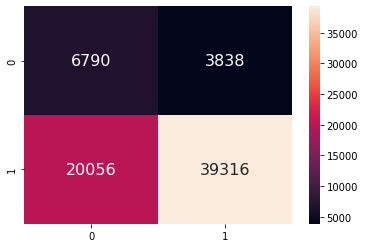

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Test confusion matrix:
[[ 2784  1771]
 [ 8723 16722]]


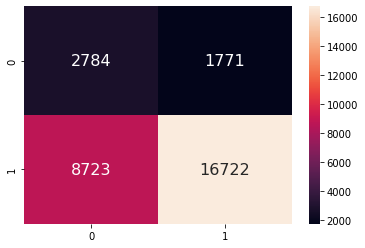

In [ ]:
best_threshold_tfidf = find_best_threshold(tr_thresholds_tfidf, train_fpr_tfidf, train_tpr_tfidf)
print("Train confusion matrix:")
cm_train_tfidf = confusion_matrix(y_train, predict_with_best_t(y_train_pred_tfidf, best_threshold_tfidf)) 
print(cm_train_tfidf)
sns.heatmap(cm_train_tfidf, annot = True, annot_kws = {"size": 16}, fmt = "g")
plt.show()

print("-" * 200)
print("Test confusion matrix:")
cm_test_tfidf = confusion_matrix(y_test, predict_with_best_t(y_test_pred_tfidf, best_threshold_tfidf)) 
print(cm_test_tfidf)
sns.heatmap(cm_test_tfidf, annot = True, annot_kws = {"size": 16}, fmt = "g")
plt.show()

In [ ]:
# printing the names of the top 20 features associated with the positive and negative classes each. (You have to print the names of the features, but not the indexes)

tfidf_features_probabilities = []

# top features positive class
for val in range(len(tfidf_features)):
    tfidf_features_probabilities.append(mdl.feature_log_prob_[1, val])

tfidf_feats_with_prob_pos = pandas.DataFrame({"feature_log_probabilities": tfidf_features_probabilities, "features": tfidf_features})
print(tfidf_feats_with_prob_pos.sort_values(by = ["feature_log_probabilities"], ascending = False)[:20])

      feature_log_probabilities           features
5053                  -3.485492            written
5059                  -3.763162           year old
5064                  -3.832576       year teacher
5054                  -3.894102               year
5056                  -3.916002            year my
5065                  -4.037796      year teaching
5086                  -4.355426          young age
5088                  -4.545365     young learners
5057                  -4.723415   year my students
5087                  -4.732142     young children
5004                  -4.789989   working students
5062                  -4.933445        year school
3986                  -4.947706    speech language
5067                  -5.108633          year they
5058                  -5.173091        year nannan
5095                  -5.183953     your donations
5052                  -5.196507     writing skills
5060                  -5.235522  year old students
5066                  -5.312705

In [ ]:
# top features negative class

tfidf_features_probabilities = []

for val in range(len(tfidf_features)):
    tfidf_features_probabilities.append(mdl.feature_log_prob_[0, val])

tfidf_feats_with_prob_neg = pandas.DataFrame({"feature_log_probabilities": tfidf_features_probabilities, "features": tfidf_features})
print(tfidf_feats_with_prob_neg.sort_values(by = ["feature_log_probabilities"], ascending = False)[:20])

      feature_log_probabilities           features
5053                  -3.532231            written
5059                  -3.754810           year old
5054                  -3.831780               year
5056                  -3.939769            year my
5064                  -3.942387       year teacher
5065                  -3.959602      year teaching
5088                  -4.521120     young learners
5086                  -4.523998          young age
5057                  -4.652345   year my students
5087                  -4.795370     young children
5004                  -4.850838   working students
5062                  -4.937622        year school
3986                  -4.955731    speech language
5067                  -4.986088          year they
5095                  -5.060447     your donations
5060                  -5.080602  year old students
5058                  -5.098740        year nannan
5052                  -5.128020     writing skills
5066                  -5.270176

<h1>Summary</h1>


In [ ]:
# Reference Link for Pretty table:  https://pypi.org/project/prettytable/

x = PrettyTable(["Vectorization","Model", "Hyper-parameter tuning", "Hyper-parameter" ,"AUC_SCORE"])
x.add_row([" BOW ", "MultinomialNB","GridSearchCV", format(best_alpha_bow, '.5f'), auc_bow])
x.add_row([" TFIDF ","MultinomialNB", "GridSearchCV", format(best_alpha_tfidf, '.5f'), auc_tfidf])
print(x)

+---------------+---------------+------------------------+-----------------+--------------------+
| Vectorization |     Model     | Hyper-parameter tuning | Hyper-parameter |     AUC_SCORE      |
+---------------+---------------+------------------------+-----------------+--------------------+
|      BOW      | MultinomialNB |      GridSearchCV      |     0.00001     | 0.6940212666781562 |
|     TFIDF     | MultinomialNB |      GridSearchCV      |     0.00001     | 0.6851681345378281 |
+---------------+---------------+------------------------+-----------------+--------------------+
